## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9667983	total: 57.1ms	remaining: 57.1s
1:	learn: 0.9476890	total: 58.1ms	remaining: 29s
2:	learn: 0.9268921	total: 59ms	remaining: 19.6s
3:	learn: 0.9106203	total: 59.8ms	remaining: 14.9s
4:	learn: 0.8937671	total: 60.6ms	remaining: 12.1s
5:	learn: 0.8769447	total: 61.4ms	remaining: 10.2s
6:	learn: 0.8604724	total: 62.1ms	remaining: 8.81s
7:	learn: 0.8440841	total: 62.9ms	remaining: 7.8s
8:	learn: 0.8292870	total: 63.6ms	remaining: 7.01s
9:	learn: 0.8133019	total: 64.4ms	remaining: 6.38s
10:	learn: 0.7992604	total: 65.2ms	remaining: 5.86s
11:	learn: 0.7848821	total: 66ms	remaining: 5.43s
12:	learn: 0.7697776	total: 66.7ms	remaining: 5.07s
13:	learn: 0.7549299	total: 67.5ms	remaining: 4.75s
14:	learn: 0.7429533	total: 68.3ms	remaining: 4.48s
15:	learn: 0.7292430	total: 68.9ms	remaining: 4.24s
16:	learn: 0.7165629	total: 69.6ms	remaining: 4.03s
17:	learn: 0.7036494	total: 70.3ms	remaining: 3.84s
18:	learn: 0.6915497	total: 71ms	remaining: 3.67s
1

54:	learn: 0.4220186	total: 105ms	remaining: 1.81s
55:	learn: 0.4181122	total: 106ms	remaining: 1.79s
56:	learn: 0.4139190	total: 107ms	remaining: 1.77s
57:	learn: 0.4093654	total: 108ms	remaining: 1.75s
58:	learn: 0.4053125	total: 109ms	remaining: 1.73s
59:	learn: 0.4018839	total: 109ms	remaining: 1.71s
60:	learn: 0.3981911	total: 110ms	remaining: 1.7s
61:	learn: 0.3938337	total: 111ms	remaining: 1.68s
62:	learn: 0.3910295	total: 112ms	remaining: 1.67s
63:	learn: 0.3879513	total: 113ms	remaining: 1.65s
64:	learn: 0.3851022	total: 114ms	remaining: 1.64s
65:	learn: 0.3816549	total: 115ms	remaining: 1.62s
66:	learn: 0.3785604	total: 116ms	remaining: 1.61s
67:	learn: 0.3752999	total: 117ms	remaining: 1.6s
68:	learn: 0.3724493	total: 117ms	remaining: 1.58s
69:	learn: 0.3693883	total: 118ms	remaining: 1.57s
70:	learn: 0.3666632	total: 119ms	remaining: 1.56s
71:	learn: 0.3632999	total: 120ms	remaining: 1.55s
72:	learn: 0.3607809	total: 121ms	remaining: 1.53s
73:	learn: 0.3577425	total: 122ms

158:	learn: 0.2461109	total: 192ms	remaining: 1.01s
159:	learn: 0.2454001	total: 193ms	remaining: 1.01s
160:	learn: 0.2448224	total: 193ms	remaining: 1.01s
161:	learn: 0.2444812	total: 194ms	remaining: 1s
162:	learn: 0.2441436	total: 195ms	remaining: 1s
163:	learn: 0.2436187	total: 196ms	remaining: 999ms
164:	learn: 0.2432328	total: 197ms	remaining: 996ms
165:	learn: 0.2425166	total: 198ms	remaining: 993ms
166:	learn: 0.2417484	total: 199ms	remaining: 991ms
167:	learn: 0.2410622	total: 200ms	remaining: 989ms
168:	learn: 0.2402364	total: 201ms	remaining: 986ms
169:	learn: 0.2395681	total: 201ms	remaining: 983ms
170:	learn: 0.2392043	total: 202ms	remaining: 979ms
171:	learn: 0.2387283	total: 203ms	remaining: 977ms
172:	learn: 0.2385398	total: 203ms	remaining: 973ms
173:	learn: 0.2380765	total: 204ms	remaining: 970ms
174:	learn: 0.2376187	total: 205ms	remaining: 968ms
175:	learn: 0.2370104	total: 206ms	remaining: 965ms
176:	learn: 0.2366517	total: 207ms	remaining: 963ms
177:	learn: 0.2356

278:	learn: 0.1924958	total: 295ms	remaining: 761ms
279:	learn: 0.1920824	total: 296ms	remaining: 760ms
280:	learn: 0.1918161	total: 296ms	remaining: 758ms
281:	learn: 0.1914107	total: 297ms	remaining: 757ms
282:	learn: 0.1912559	total: 298ms	remaining: 755ms
283:	learn: 0.1907253	total: 299ms	remaining: 754ms
284:	learn: 0.1903574	total: 300ms	remaining: 752ms
285:	learn: 0.1900305	total: 301ms	remaining: 750ms
286:	learn: 0.1894734	total: 301ms	remaining: 749ms
287:	learn: 0.1889168	total: 302ms	remaining: 748ms
288:	learn: 0.1887595	total: 303ms	remaining: 746ms
289:	learn: 0.1883352	total: 304ms	remaining: 745ms
290:	learn: 0.1876460	total: 305ms	remaining: 743ms
291:	learn: 0.1874052	total: 306ms	remaining: 742ms
292:	learn: 0.1872729	total: 307ms	remaining: 740ms
293:	learn: 0.1869072	total: 307ms	remaining: 738ms
294:	learn: 0.1862882	total: 308ms	remaining: 737ms
295:	learn: 0.1859080	total: 309ms	remaining: 735ms
296:	learn: 0.1858335	total: 310ms	remaining: 734ms
297:	learn: 

366:	learn: 0.1618786	total: 376ms	remaining: 648ms
367:	learn: 0.1616523	total: 377ms	remaining: 647ms
368:	learn: 0.1612819	total: 377ms	remaining: 646ms
369:	learn: 0.1608017	total: 378ms	remaining: 644ms
370:	learn: 0.1605220	total: 379ms	remaining: 643ms
371:	learn: 0.1600964	total: 380ms	remaining: 642ms
372:	learn: 0.1596932	total: 381ms	remaining: 640ms
373:	learn: 0.1596382	total: 382ms	remaining: 639ms
374:	learn: 0.1592701	total: 382ms	remaining: 637ms
375:	learn: 0.1590785	total: 383ms	remaining: 636ms
376:	learn: 0.1587275	total: 384ms	remaining: 635ms
377:	learn: 0.1584222	total: 385ms	remaining: 634ms
378:	learn: 0.1580886	total: 386ms	remaining: 632ms
379:	learn: 0.1577901	total: 387ms	remaining: 631ms
380:	learn: 0.1573922	total: 387ms	remaining: 629ms
381:	learn: 0.1570803	total: 388ms	remaining: 628ms
382:	learn: 0.1567718	total: 389ms	remaining: 626ms
383:	learn: 0.1564939	total: 389ms	remaining: 624ms
384:	learn: 0.1562914	total: 390ms	remaining: 623ms
385:	learn: 

494:	learn: 0.1278482	total: 480ms	remaining: 489ms
495:	learn: 0.1274796	total: 481ms	remaining: 488ms
496:	learn: 0.1273912	total: 481ms	remaining: 487ms
497:	learn: 0.1270496	total: 482ms	remaining: 486ms
498:	learn: 0.1268447	total: 483ms	remaining: 485ms
499:	learn: 0.1265433	total: 484ms	remaining: 484ms
500:	learn: 0.1263543	total: 485ms	remaining: 483ms
501:	learn: 0.1261309	total: 486ms	remaining: 482ms
502:	learn: 0.1260141	total: 487ms	remaining: 481ms
503:	learn: 0.1258557	total: 487ms	remaining: 480ms
504:	learn: 0.1257874	total: 488ms	remaining: 479ms
505:	learn: 0.1257615	total: 489ms	remaining: 477ms
506:	learn: 0.1255937	total: 490ms	remaining: 476ms
507:	learn: 0.1253377	total: 491ms	remaining: 475ms
508:	learn: 0.1251140	total: 492ms	remaining: 474ms
509:	learn: 0.1250110	total: 493ms	remaining: 473ms
510:	learn: 0.1247513	total: 494ms	remaining: 472ms
511:	learn: 0.1246110	total: 495ms	remaining: 472ms
512:	learn: 0.1244157	total: 496ms	remaining: 471ms
513:	learn: 

593:	learn: 0.1098038	total: 565ms	remaining: 386ms
594:	learn: 0.1096471	total: 566ms	remaining: 385ms
595:	learn: 0.1096299	total: 567ms	remaining: 384ms
596:	learn: 0.1093753	total: 568ms	remaining: 383ms
597:	learn: 0.1091635	total: 569ms	remaining: 382ms
598:	learn: 0.1089953	total: 569ms	remaining: 381ms
599:	learn: 0.1088784	total: 570ms	remaining: 380ms
600:	learn: 0.1085838	total: 571ms	remaining: 379ms
601:	learn: 0.1083797	total: 572ms	remaining: 378ms
602:	learn: 0.1081405	total: 573ms	remaining: 377ms
603:	learn: 0.1080827	total: 573ms	remaining: 376ms
604:	learn: 0.1079801	total: 574ms	remaining: 375ms
605:	learn: 0.1077105	total: 575ms	remaining: 374ms
606:	learn: 0.1076281	total: 576ms	remaining: 373ms
607:	learn: 0.1073642	total: 577ms	remaining: 372ms
608:	learn: 0.1071919	total: 578ms	remaining: 371ms
609:	learn: 0.1069217	total: 579ms	remaining: 370ms
610:	learn: 0.1068337	total: 580ms	remaining: 369ms
611:	learn: 0.1066629	total: 580ms	remaining: 368ms
612:	learn: 

725:	learn: 0.0878160	total: 668ms	remaining: 252ms
726:	learn: 0.0876979	total: 669ms	remaining: 251ms
727:	learn: 0.0874828	total: 670ms	remaining: 250ms
728:	learn: 0.0874462	total: 671ms	remaining: 249ms
729:	learn: 0.0874055	total: 671ms	remaining: 248ms
730:	learn: 0.0873620	total: 672ms	remaining: 247ms
731:	learn: 0.0872177	total: 672ms	remaining: 246ms
732:	learn: 0.0871807	total: 673ms	remaining: 245ms
733:	learn: 0.0869989	total: 674ms	remaining: 244ms
734:	learn: 0.0868169	total: 675ms	remaining: 243ms
735:	learn: 0.0867840	total: 675ms	remaining: 242ms
736:	learn: 0.0865706	total: 676ms	remaining: 241ms
737:	learn: 0.0865265	total: 677ms	remaining: 240ms
738:	learn: 0.0865133	total: 677ms	remaining: 239ms
739:	learn: 0.0863875	total: 678ms	remaining: 238ms
740:	learn: 0.0863086	total: 679ms	remaining: 237ms
741:	learn: 0.0861719	total: 680ms	remaining: 236ms
742:	learn: 0.0860094	total: 680ms	remaining: 235ms
743:	learn: 0.0859970	total: 681ms	remaining: 234ms
744:	learn: 

803:	learn: 0.0785048	total: 757ms	remaining: 185ms
804:	learn: 0.0784049	total: 759ms	remaining: 184ms
805:	learn: 0.0782268	total: 760ms	remaining: 183ms
806:	learn: 0.0780211	total: 761ms	remaining: 182ms
807:	learn: 0.0779120	total: 762ms	remaining: 181ms
808:	learn: 0.0777435	total: 764ms	remaining: 180ms
809:	learn: 0.0777237	total: 765ms	remaining: 179ms
810:	learn: 0.0777133	total: 766ms	remaining: 178ms
811:	learn: 0.0776009	total: 767ms	remaining: 177ms
812:	learn: 0.0774296	total: 768ms	remaining: 177ms
813:	learn: 0.0772987	total: 769ms	remaining: 176ms
814:	learn: 0.0771550	total: 770ms	remaining: 175ms
815:	learn: 0.0770469	total: 771ms	remaining: 174ms
816:	learn: 0.0769383	total: 772ms	remaining: 173ms
817:	learn: 0.0768268	total: 773ms	remaining: 172ms
818:	learn: 0.0767922	total: 774ms	remaining: 171ms
819:	learn: 0.0767187	total: 775ms	remaining: 170ms
820:	learn: 0.0766714	total: 775ms	remaining: 169ms
821:	learn: 0.0765564	total: 776ms	remaining: 168ms
822:	learn: 

918:	learn: 0.0666883	total: 860ms	remaining: 75.8ms
919:	learn: 0.0665957	total: 861ms	remaining: 74.9ms
920:	learn: 0.0665258	total: 862ms	remaining: 73.9ms
921:	learn: 0.0664682	total: 863ms	remaining: 73ms
922:	learn: 0.0663548	total: 863ms	remaining: 72ms
923:	learn: 0.0661896	total: 864ms	remaining: 71.1ms
924:	learn: 0.0661003	total: 865ms	remaining: 70.1ms
925:	learn: 0.0659863	total: 866ms	remaining: 69.2ms
926:	learn: 0.0658791	total: 867ms	remaining: 68.2ms
927:	learn: 0.0657895	total: 867ms	remaining: 67.3ms
928:	learn: 0.0656980	total: 868ms	remaining: 66.4ms
929:	learn: 0.0656536	total: 869ms	remaining: 65.4ms
930:	learn: 0.0656172	total: 870ms	remaining: 64.5ms
931:	learn: 0.0654350	total: 871ms	remaining: 63.5ms
932:	learn: 0.0653414	total: 872ms	remaining: 62.6ms
933:	learn: 0.0652452	total: 872ms	remaining: 61.6ms
934:	learn: 0.0651004	total: 873ms	remaining: 60.7ms
935:	learn: 0.0649987	total: 874ms	remaining: 59.8ms
936:	learn: 0.0648923	total: 875ms	remaining: 58.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

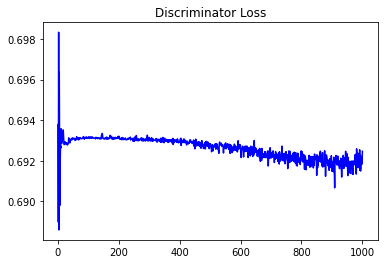

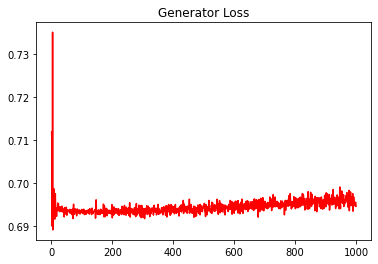

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23899331643459037


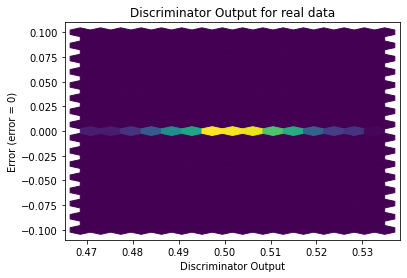

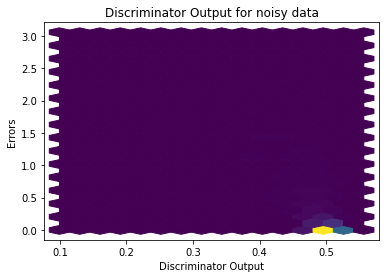

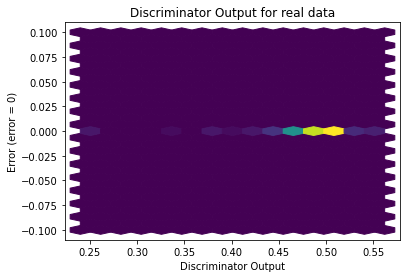

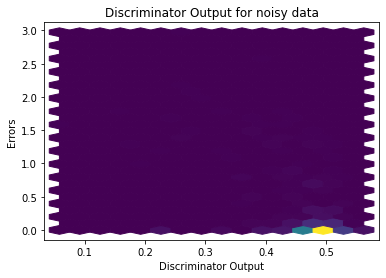

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


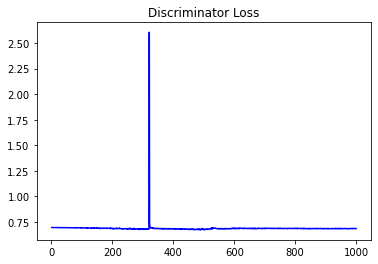

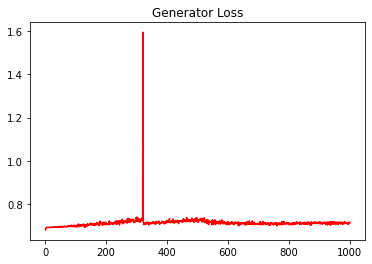

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20845462499388706


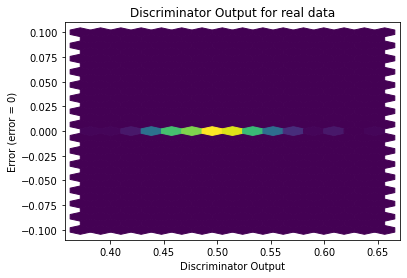

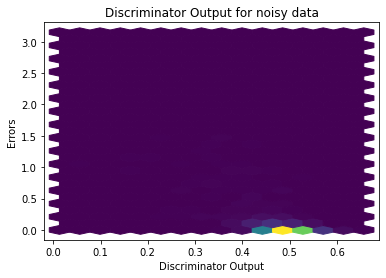

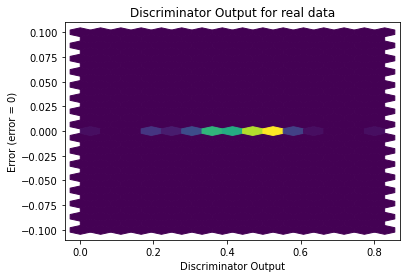

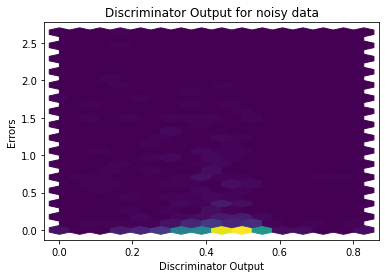

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1236]], requires_grad=True)
